In [2]:
from integrate_and_fire import *

In [3]:
# Exercise 1
# Create two matrices A and B with random numbers
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# a) Determine the size of each matrix
print(A.shape, B.shape)

# b) Add the two matrices
print(A + B)

# subtract the two matrices
print(A - B)

# Element-wise multiply the two matrices
print(A * B)

(3, 3) (3, 3)
[[10 10 10]
 [10 10 10]
 [10 10 10]]
[[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]
[[ 9 16 21]
 [24 25 24]
 [21 16  9]]


In [4]:
# Exercise 2
# a) Create a vector using only the first two arguments
x = np.linspace(-10, 10)  # default 50 points, unlike MATLAB's 100 points default

# b) Create a vector using all 3 arguments
y = np.linspace(0, 10, 10)

# c) MATLAB's linspace defaults to 100 points, while its colon operator defaults to 1 step. 
#       Meanwhile, Numpy's linspace defaults to 50 points.

[1.         0.94959079 0.90172266 0.85626753 0.81310376 0.77211584
 0.73319409 0.69623435 0.66113772 0.62781029 0.59616287 0.56611077
 0.53757357 0.51047491 0.48474227 0.46030679 0.43710309 0.41506907
 0.39414576 0.37427718 0.35541017 0.33749422 0.3204814  0.30432619
 0.28898534 0.27441782 0.26058463 0.24744877 0.23497507 0.22313016]


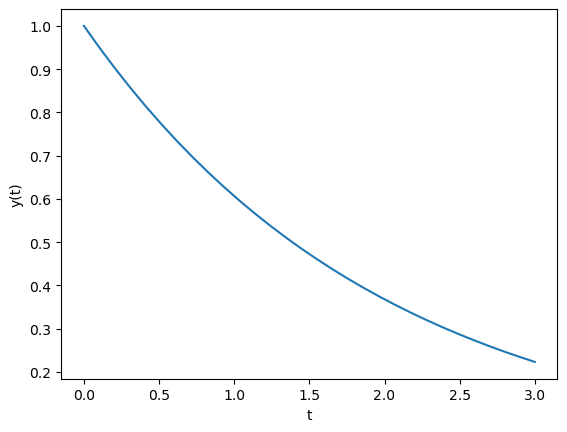

In [5]:
# Exercise 3
# Create a function exponential_decay
def exponential_decay(t, kappa):
    return np.exp(-t / kappa)

# a) evaluate the function at t=0:0.1:3 and kappa=2
t = np.linspace(0, 3, 30)
print(exponential_decay(t, 2))

# b) plot the function with labeled x-axis and y-axis
plt.plot(t, exponential_decay(t, 2))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

Simulating the Integrate-and-Fire model without the refractory period


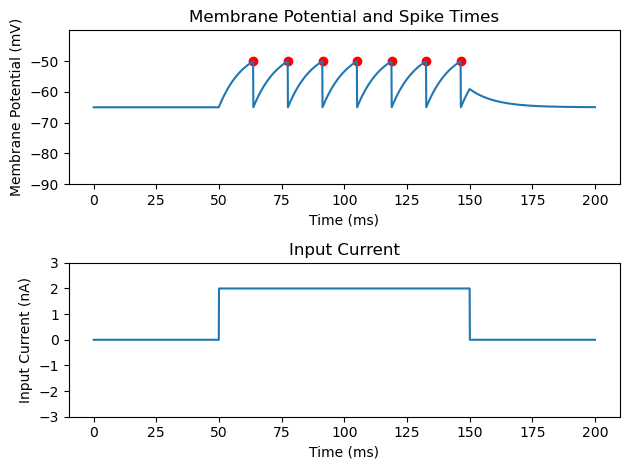

(array([-65.        , -65.        , -65.        , ..., -64.96023892,
        -64.96063653, -64.96103016]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 [63.7,
  77.5,
  91.30000000000001,
  105.10000000000001,
  118.9,
  132.70000000000002,
  146.5])

In [6]:
# Exercise 4

# first run default (Current source 'step', refractory period 'False')
run_simulation(Current_source, N, time, refractory_period)

# a) Describe the plots and spike times.
# This shows 7 spike times (labeled in red) where V_th is exceeded
# The first plot shows Membrane potential over time
#       as simulated by the integrate and fire model without refractory period
# The second plot shows Input Current over time, a step function

Simulating the Integrate-and-Fire model with the refractory period


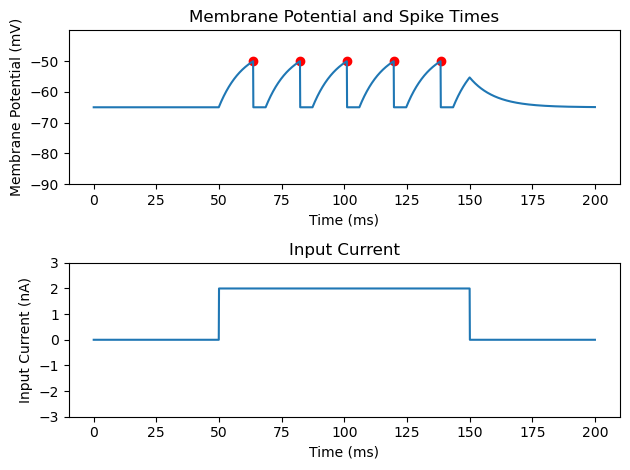

(array([-65.        , -65.        , -65.        , ..., -64.93499065,
        -64.93564074, -64.93628433]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 [63.7, 82.4, 101.10000000000001, 119.80000000000001, 138.5])

In [7]:
# b) Turn on refractory period
refractory_period = True
run_simulation(Current_source, N, time, refractory_period)
# 5 spikes are observed

Simulating the Integrate-and-Fire model with the refractory period


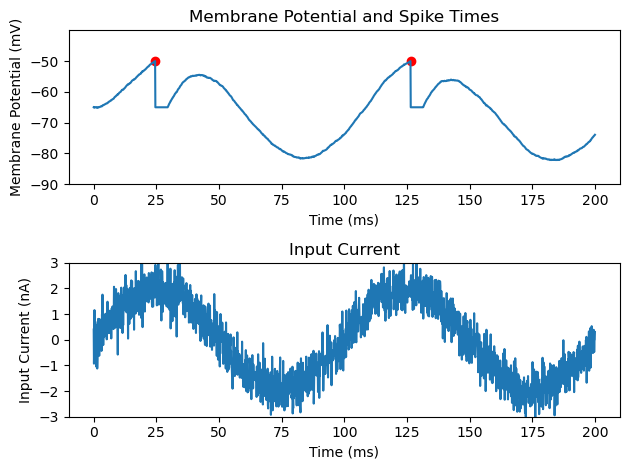

(array([-65.        , -65.09307486, -65.12133938, ..., -74.14681915,
        -74.0553486 , -73.93430969]),
 array([ 3.98875999e-01, -9.30748610e-01, -2.91952718e-01, ...,
        -1.55850785e-02,  2.35932891e-05,  3.04854300e-01]),
 [24.6, 126.5])

In [8]:
# c) re-run with Current source 'sine'
Current_source = 'sine'
run_simulation(Current_source, N, time, refractory_period)
# 2 spikes are observed

Simulating the Integrate-and-Fire model with the refractory period


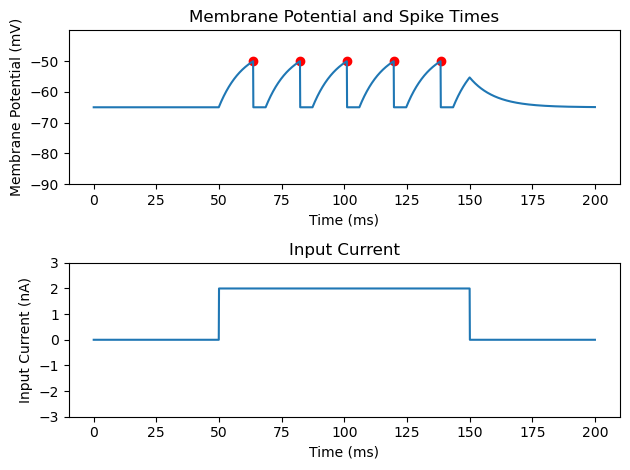

[18.7 18.7 18.7 18.7] 0.053475935828877004


In [9]:
# d) With Current source 'step', calculate the time interval between spikes and the spike rate
Current_source = 'step'
V, I, spike_times = run_simulation(Current_source, N, time, refractory_period)
T = np.diff(spike_times)
print(T, 1 / np.average(T))

In [10]:
# e) Calculate the spike rate for different input current values
spike_rates = []
input_currents = [1,2,4,6,8,10]
for default_step_current in input_currents:
    V, I, spike_times = run_simulation(Current_source, N, time, refractory_period, default_step_current, skip_plot=True)
    T = np.diff(spike_times)
    if len(spike_times) == 0:
        T = [np.inf]
    print("Spike rate for input current", default_step_current, "is", 1 / np.average(T))
    spike_rates.append(1 / np.average(T))

Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 1 is 0.0
Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 2 is 0.053475935828877004
Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 4 is 0.10416666666666666
Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 6 is 0.12820512820512822
Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 8 is 0.14285714285714285
Simulating the Integrate-and-Fire model with the refractory period
Spike rate for input current 10 is 0.15151515151515152


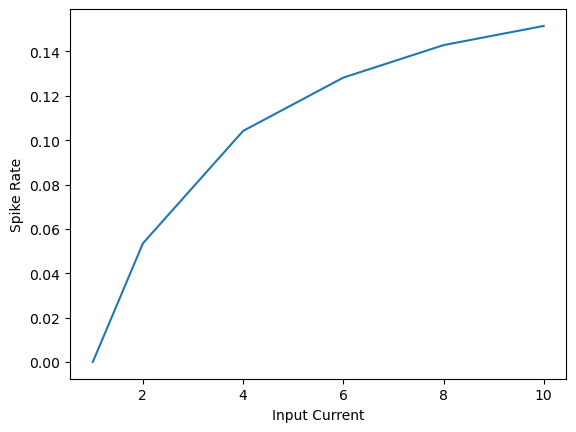

In [11]:
# f) Write code to plot spiking rate (on the y-axis) versus input current (on the x-axis)
plt.plot(input_currents, spike_rates)
plt.xlabel('Input Current')
plt.ylabel('Spike Rate')
plt.show()